In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Converting Sales column from Numeric to Categorical Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


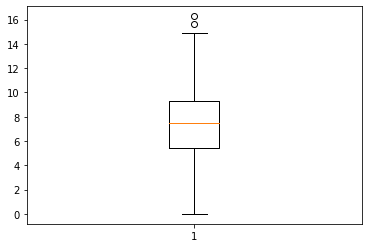

In [4]:
#Box plot of Sales column
plt.boxplot(data['Sales'])
plt.show()

In [5]:
#Calculate IQR for Sales Calumn
array = np.array(data['Sales']).reshape(-1,1)

#calculate interquartile range 
q3, q1 = np.percentile(array, [75 ,25])
q3,q1

(9.32, 5.390000000000001)

In [6]:
sales = pd.cut(data['Sales'],bins=[-1, 5.39, 9.32, 16.3 ],labels=['Low' , 'Medium' , 'High'])
sales.head()

0      High
1      High
2      High
3    Medium
4       Low
Name: Sales, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [7]:
data1 = data.copy()
data1['Sales'] = sales
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


## EDA on data1

In [8]:
data1.shape

(400, 11)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [10]:
data1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
data1.duplicated().sum()

0

In [12]:
data_summary = data1.describe()
data_summary.loc['skewness'] = data1.skew()
data_summary.loc['kurtosis'] = data1.kurtosis()
data_summary

C:\Users\ayush\AppData\Local\Temp/ipykernel_16852/1882288317.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_summary.loc['skewness'] = data1.skew()
C:\Users\ayush\AppData\Local\Temp/ipykernel_16852/1882288317.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_summary.loc['kurtosis'] = data1.kurtosis()


,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000
skewness,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [13]:
# Value counts
data1['Sales'].value_counts()

Medium    201
Low       100
High       99
Name: Sales, dtype: int64

In [14]:
data1['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [15]:
data1['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [16]:
data1['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

### Compairing different columns w.r.t  'y'

In [17]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


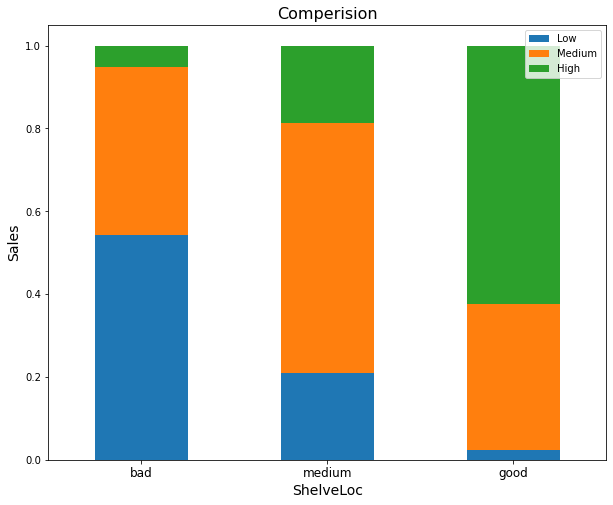

In [18]:
# Stacked barplot of Sales vs ShelveLoc
bad = data1.loc[data1['ShelveLoc']=='Bad', :]['Sales'].value_counts(normalize = True)
medium = data1.loc[data1['ShelveLoc']=='Medium', :]['Sales'].value_counts(normalize = True)
good = data1.loc[data1['ShelveLoc']=='Good', :]['Sales'].value_counts(normalize = True)
data1_plot  = pd.DataFrame([bad,medium,good])
data1_plot.index=['bad','medium','good']

# Plot
data1_plot.plot(kind='bar',figsize = (10,8),stacked=True, title='Stacked Bar plot')
plt.xlabel('ShelveLoc',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Comperision',fontsize = 16);

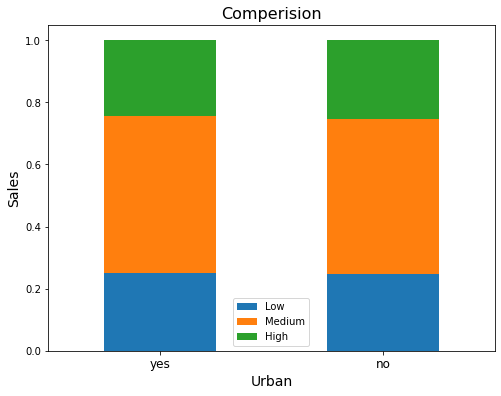

In [19]:
# Stacked barplot of Sales vs ShelveLoc
yes = data1.loc[data1['Urban']=='Yes', :]['Sales'].value_counts(normalize = True)
no = data1.loc[data1['Urban']=='No', :]['Sales'].value_counts(normalize = True)
data1_plot  = pd.DataFrame([yes,no])
data1_plot.index=['yes','no']

# Plot
data1_plot.plot(kind='bar',figsize = (8,6),stacked=True, title='Stacked Bar plot')
plt.xlabel('Urban',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Comperision',fontsize = 16);

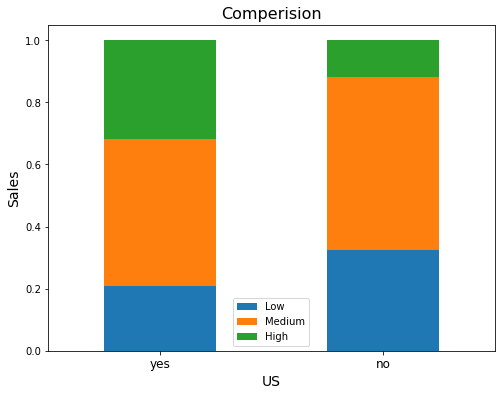

In [20]:
# Stacked barplot of Sales vs ShelveLoc
yes = data1.loc[data1['US']=='Yes', :]['Sales'].value_counts(normalize = True)
no = data1.loc[data1['US']=='No', :]['Sales'].value_counts(normalize = True)
data1_plot  = pd.DataFrame([yes,no])
data1_plot.index=['yes','no']

# Plot
data1_plot.plot(kind='bar',figsize = (8,6),stacked=True, title='Stacked Bar plot')
plt.xlabel('US',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Comperision',fontsize = 16);

In [21]:
data_summary

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000
skewness,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


Transforme the dataset so that it closely resembles a normal distribution

### Data Transformation

In [22]:
cat_cols = ['ShelveLoc','Urban','US','Sales']
num_cols = ['CompPrice','Income','Advertising','Population','Price','Age','Education']
data_norm = data1[num_cols]
data_norm.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13


In [23]:
# Normalize the numerical data

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0.1 , 1))

minmax = minmax.fit_transform(data_norm)
data_norm = pd.DataFrame(data = minmax , columns = num_cols)
data_norm

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.660204,0.572727,0.441379,0.579760,0.617365,0.378182,0.8875
1,0.412245,0.345455,0.596552,0.550902,0.417964,0.754545,0.1000
2,0.430612,0.227273,0.410345,0.567134,0.401796,0.656364,0.3250
3,0.467347,0.818182,0.224138,0.922445,0.493413,0.590909,0.5500
4,0.687755,0.490909,0.193103,0.695190,0.660479,0.312727,0.4375
...,...,...,...,...,...,...,...
395,0.660204,0.890909,0.627586,0.448096,0.660479,0.230909,0.5500
396,0.669388,0.118182,0.193103,0.148697,0.617365,0.590909,0.2125
397,0.880612,0.145455,0.472414,0.745691,0.827545,0.345455,1.0000
398,0.311224,0.627273,0.317241,0.594188,0.482635,0.509091,0.3250


In [24]:
data_boxcox = pd.DataFrame(columns = num_cols)
data_boxcox

,CompPrice,Income,Advertising,Population,Price,Age,Education


In [25]:
# Box-Cox Transformation
data_boxcox = pd.DataFrame()
from scipy.stats import boxcox

for i in range(data_norm.shape[1]):
    fitted_data, fitted_lambda = boxcox(data_norm.iloc[:,i])
    data_boxcox[num_cols[i]] = fitted_data

data_boxcox

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,-0.336841,-0.460016,-0.815426,-0.443611,-0.367362,-0.668100,-0.114796
1,-0.577809,-0.745459,-0.515621,-0.476253,-0.543718,-0.251243,-1.188008
2,-0.560146,-0.915278,-0.887882,-0.457848,-0.557425,-0.355548,-0.795192
3,-0.524720,-0.186990,-1.487401,-0.078226,-0.478495,-0.426578,-0.494567
4,-0.309778,-0.558174,-1.634747,-0.316345,-0.327680,-0.746785,-0.638144
...,...,...,...,...,...,...,...
395,-0.336841,-0.110889,-0.465087,-0.595743,-0.327680,-0.849354,-0.494567
396,-0.327826,-1.097256,-1.634747,-0.989240,-0.367362,-0.426578,-0.972635
397,-0.119052,-1.048363,-0.747861,-0.262135,-0.169562,-0.707120,0.000000
398,-0.674272,-0.396825,-1.143319,-0.427422,-0.487933,-0.517324,-0.795192


In [26]:
data_summary

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000
skewness,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [27]:
data_boxcox_summary = data_boxcox.describe()
data_boxcox_summary.loc['skewness'] = data_boxcox.skew()
data_boxcox_summary.loc['kurtosis'] = data_boxcox.kurtosis()
data_boxcox_summary

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.452881,-0.530339,-1.430828,-0.483836,-0.385649,-0.470276,-0.548863
std,0.136702,0.314597,0.732642,0.309425,0.115139,0.299297,0.384067
min,-0.870496,-1.131668,-2.283437,-1.065763,-0.788713,-1.029036,-1.188008
25%,-0.542449,-0.811644,-2.283437,-0.737315,-0.464266,-0.712057,-0.795192
50%,-0.453496,-0.503106,-1.359064,-0.451738,-0.382113,-0.435561,-0.494567
75%,-0.363853,-0.274976,-0.747861,-0.203979,-0.312673,-0.234095,-0.234728
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skewness,-0.004025,-0.162794,-0.002845,-0.196718,0.030585,-0.202506,-0.205612
kurtosis,0.027907,-1.055935,-1.587230,-1.139694,0.314679,-1.075916,-1.196935


In [28]:
data_boxcox[cat_cols] = data1[cat_cols]
data_boxcox.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,-0.336841,-0.460016,-0.815426,-0.443611,-0.367362,-0.668100,-0.114796,Bad,Yes,Yes,High
1,-0.577809,-0.745459,-0.515621,-0.476253,-0.543718,-0.251243,-1.188008,Good,Yes,Yes,High
2,-0.560146,-0.915278,-0.887882,-0.457848,-0.557425,-0.355548,-0.795192,Medium,Yes,Yes,High
3,-0.524720,-0.186990,-1.487401,-0.078226,-0.478495,-0.426578,-0.494567,Medium,Yes,Yes,Medium
4,-0.309778,-0.558174,-1.634747,-0.316345,-0.327680,-0.746785,-0.638144,Bad,Yes,No,Low


In [29]:
data_norm[cat_cols] = data1[cat_cols]
data_norm.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,0.660204,0.572727,0.441379,0.579760,0.617365,0.378182,0.8875,Bad,Yes,Yes,High
1,0.412245,0.345455,0.596552,0.550902,0.417964,0.754545,0.1000,Good,Yes,Yes,High
2,0.430612,0.227273,0.410345,0.567134,0.401796,0.656364,0.3250,Medium,Yes,Yes,High
3,0.467347,0.818182,0.224138,0.922445,0.493413,0.590909,0.5500,Medium,Yes,Yes,Medium
4,0.687755,0.490909,0.193103,0.695190,0.660479,0.312727,0.4375,Bad,Yes,No,Low


### Data Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encoding the dataset using Label Encoder
le = LabelEncoder()

data_boxcox.iloc[:,7] = le.fit_transform(data_boxcox.iloc[:,7])
data_boxcox.iloc[:,8] = le.fit_transform(data_boxcox.iloc[:,8])
data_boxcox.iloc[:,9] = le.fit_transform(data_boxcox.iloc[:,9])

maped_data = data_boxcox['Sales'].map({'High':2 , 'Medium':1 , 'Low':0})
data_boxcox['Sales'] = maped_data

data_boxcox.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,-0.336841,-0.460016,-0.815426,-0.443611,-0.367362,-0.668100,-0.114796,0,1,1,2
1,-0.577809,-0.745459,-0.515621,-0.476253,-0.543718,-0.251243,-1.188008,1,1,1,2
2,-0.560146,-0.915278,-0.887882,-0.457848,-0.557425,-0.355548,-0.795192,2,1,1,2
3,-0.524720,-0.186990,-1.487401,-0.078226,-0.478495,-0.426578,-0.494567,2,1,1,1
4,-0.309778,-0.558174,-1.634747,-0.316345,-0.327680,-0.746785,-0.638144,0,1,0,0


In [31]:
data_norm.iloc[:,7] = le.fit_transform(data_norm.iloc[:,7])
data_norm.iloc[:,8] = le.fit_transform(data_norm.iloc[:,8])
data_norm.iloc[:,9] = le.fit_transform(data_norm.iloc[:,9])

maped_data = data_norm['Sales'].map({'High':2 , 'Medium':1 , 'Low':0})
data_norm['Sales'] = maped_data

data_norm.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,0.660204,0.572727,0.441379,0.579760,0.617365,0.378182,0.8875,0,1,1,2
1,0.412245,0.345455,0.596552,0.550902,0.417964,0.754545,0.1000,1,1,1,2
2,0.430612,0.227273,0.410345,0.567134,0.401796,0.656364,0.3250,2,1,1,2
3,0.467347,0.818182,0.224138,0.922445,0.493413,0.590909,0.5500,2,1,1,1
4,0.687755,0.490909,0.193103,0.695190,0.660479,0.312727,0.4375,0,1,0,0


### Feature Engineering

In [32]:
from sklearn.tree import  DecisionTreeClassifier

In [33]:
# Spliting into X and y
X = data_boxcox.iloc[:,:-1]
y = data_boxcox.iloc[:,-1]

In [34]:
#Feature Extraction 
feature_model = DecisionTreeClassifier()
feature_model.fit(X,y)

DecisionTreeClassifier()

In [35]:
data_boxcox.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales
0,-0.336841,-0.460016,-0.815426,-0.443611,-0.367362,-0.668100,-0.114796,0,1,1,2
1,-0.577809,-0.745459,-0.515621,-0.476253,-0.543718,-0.251243,-1.188008,1,1,1,2
2,-0.560146,-0.915278,-0.887882,-0.457848,-0.557425,-0.355548,-0.795192,2,1,1,2
3,-0.524720,-0.186990,-1.487401,-0.078226,-0.478495,-0.426578,-0.494567,2,1,1,1
4,-0.309778,-0.558174,-1.634747,-0.316345,-0.327680,-0.746785,-0.638144,0,1,0,0


In [36]:
np.set_printoptions(precision=3)
print(feature_model.feature_importances_)

[0.112 0.084 0.134 0.126 0.217 0.132 0.05  0.12  0.024 0.   ]


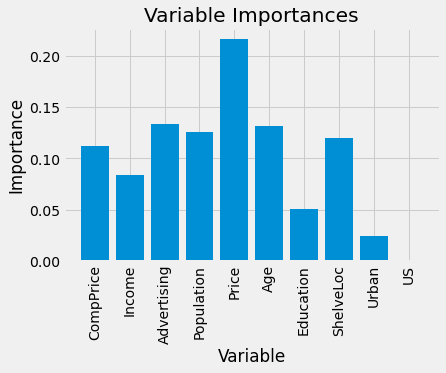

In [37]:
# Set the style
plt.style.use('fivethirtyeight')

importances = feature_model.feature_importances_
feature_list = list(X.columns)

# list of x locations for plotting
X_values = list(range(len(importances)))
# Make a bar chart
plt.bar(X_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(X_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [38]:
final_data = data_boxcox.drop(['US' , 'Urban' , 'Education'] , axis =1)
final_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc,Sales
0,-0.336841,-0.460016,-0.815426,-0.443611,-0.367362,-0.668100,0,2
1,-0.577809,-0.745459,-0.515621,-0.476253,-0.543718,-0.251243,1,2
2,-0.560146,-0.915278,-0.887882,-0.457848,-0.557425,-0.355548,2,2
3,-0.524720,-0.186990,-1.487401,-0.078226,-0.478495,-0.426578,2,1
4,-0.309778,-0.558174,-1.634747,-0.316345,-0.327680,-0.746785,0,0


## Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score , f1_score
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score ,RandomizedSearchCV

In [40]:
X.shape , y.shape

((400, 10), (400,))

In [41]:
y.value_counts()

1    201
0    100
2     99
Name: Sales, dtype: int64

In [42]:
# Spliting into X and y
X = data_boxcox.iloc[:,:-1]
y = data_boxcox.iloc[:,-1]

In [43]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,stratify = y, random_state = 42)

In [44]:
# Spliting into X and y
X_norm = data_norm.iloc[:,:-1]
y_norm = data_norm.iloc[:,-1]

In [45]:
# split X and y into training and testing using normalized dataset
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size = 0.2 ,
                                                                        stratify = y, random_state = 42)

In [46]:
#Model Building
model = RandomForestClassifier(n_estimators = 100 , max_features = 4,class_weight='balanced' , random_state=42 )

In [47]:
kfold = KFold(n_splits = 10)
result = cross_val_score(model, X, y, cv=kfold)
print(result.mean())

0.6824999999999999


In [48]:
kfold = KFold(n_splits = 10)
result = cross_val_score(model, X_norm, y_norm, cv=kfold)
print(result.mean())

0.6824999999999999


### Hyperparameter Tuning

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)]

# Number of features to consider at every split
max_features = [2,3,4,'auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features, 'max_depth': max_depth,
              'criterion':["gini", "entropy"]}

In [50]:
rf = RandomForestClassifier(class_weight='balanced' , ccp_alpha=0.0093, random_state=42)

gcv = GridSearchCV(estimator = rf, param_grid = random_grid, 
                  cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
gcv.fit(X_train, y_train)

Fitting 3 folds for each of 352 candidates, totalling 1056 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(ccp_alpha=0.0093,
                                              class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [2, 3, 4, 'auto'],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [51]:
print(gcv.best_score_)
print(gcv.best_estimator_)
print(gcv.best_params_)

0.653059425145477
RandomForestClassifier(ccp_alpha=0.0093, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features=4,
                       n_estimators=400, random_state=42)
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 4, 'n_estimators': 400}


In [52]:
rf = RandomForestClassifier(class_weight='balanced' ,ccp_alpha=0.0093, random_state=42)

gcv_norm = GridSearchCV(estimator = rf, param_grid = random_grid, 
                  cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
gcv_norm.fit(X_norm_train, y_norm_train)

Fitting 3 folds for each of 352 candidates, totalling 1056 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(ccp_alpha=0.0093,
                                              class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [2, 3, 4, 'auto'],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [53]:
print(gcv_norm.best_score_)
print(gcv_norm.best_estimator_)
print(gcv_norm.best_params_)

0.653059425145477
RandomForestClassifier(ccp_alpha=0.0093, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features=4,
                       random_state=42)
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'n_estimators': 100}


In [54]:
rf = RandomForestClassifier(class_weight='balanced' , ccp_alpha=0.0093, random_state=42)

rcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                  cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rcv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(ccp_alpha=0.0093,
                                                    class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': [2, 3, 4, 'auto'],
                                        'n_estimators': [100, 200, 300, 400]},
                   verbose=2)

In [55]:
print(rcv.best_score_)
print(rcv.best_estimator_)
print(rcv.best_params_)

0.6468288955504614
RandomForestClassifier(ccp_alpha=0.0093, class_weight='balanced',
                       criterion='entropy', max_features=2, n_estimators=300,
                       random_state=42)
{'n_estimators': 300, 'max_features': 2, 'max_depth': None, 'criterion': 'entropy'}


In [56]:
rf = RandomForestClassifier(class_weight='balanced' ,ccp_alpha=0.0093, random_state=42)

rcv_norm = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                  cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rcv_norm.fit(X_norm_train, y_norm_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(ccp_alpha=0.0093,
                                                    class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': [2, 3, 4, 'auto'],
                                        'n_estimators': [100, 200, 300, 400]},
                   verbose=2)

In [57]:
print(rcv_norm.best_score_)
print(rcv_norm.best_estimator_)
print(rcv_norm.best_params_)

0.6499147710574267
RandomForestClassifier(ccp_alpha=0.0093, class_weight='balanced', max_depth=5,
                       max_features=2, n_estimators=300, random_state=42)
{'n_estimators': 300, 'max_features': 2, 'max_depth': 5, 'criterion': 'gini'}


In [58]:
search_cv_cols = ['gcv' , 'gcv_norm' , 'rcv' , 'rcv_norm']
search_cv_data = {'gcv':gcv.best_params_,'gcv_norm':gcv_norm.best_params_,'rcv':rcv.best_params_,
                  'rcv_norm':rcv_norm.best_params_}

In [59]:
search_cv_df = pd.DataFrame( search_cv_data, index=rcv_norm.best_params_.keys(), columns = search_cv_cols)
search_cv_df.loc['Accuracy'] = [gcv.best_score_,gcv_norm.best_score_,rcv.best_score_,rcv_norm.best_score_]
search_cv_df

,gcv,gcv_norm,rcv,rcv_norm
n_estimators,400,100,300,300
max_features,4,4,2,2
max_depth,7,9,None,5
criterion,entropy,entropy,entropy,gini
Accuracy,0.653059,0.653059,0.646829,0.649915


In [60]:
best_model = RandomForestClassifier(class_weight='balanced', ccp_alpha=0.0093, criterion='entropy', 
                                    max_depth=6, max_features=2, n_estimators=100,random_state=42)

kfold = KFold(n_splits = 10, shuffle=True, random_state=42)
result = cross_val_score(best_model, X_norm, y_norm, cv=kfold)
print(result.mean())

0.65


In [61]:
best_model = RandomForestClassifier(class_weight='balanced', ccp_alpha=0.0093, criterion='entropy', 
                                    max_depth=8, max_features=3, n_estimators=100,random_state=42)

kfold = KFold(n_splits = 5 , shuffle=True, random_state=42)
result = cross_val_score(best_model, X_norm, y_norm, cv=kfold)
print(result.mean())

0.6875
